In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special
import scipy.ndimage
import scipy.optimize
import sklearn.datasets

from chmp.ds import mpl_set, get_color_cycle
from chmp.experiment import Loop

In [2]:
# helper for gradient checking
def approximate_gradient(x, func, eps=1e-5):
    res = np.zeros(x.size)
    
    for i in range(x.size):
        d = np.zeros(x.size)
        d[i] = eps
        
        res[i] = (func(x + d) - func(x - d)) / (2 * eps)
    
    return res

# Chapter 2

## Binary Variables

## Multinomial Variables

## The Gaussian distribution

Marginal and conditional Gaussians (see (2.113) - (2.117)):
    
$$
\begin{align}
    p(x) &= \mathcal{N}(x|\mu, \Lambda^{-1}) \\
    p(y|x) &= \mathcal{N}(y|A x + b, L^{-1}) \\
    p(y) &= \int \mathrm{d}x\; p(y|x)p(x) 
        = \mathcal{N}(y|A\mu + b, L^{-1} + A \Lambda^{-1} A^T) \\
    p(x|y) &= \frac{p(y|x)p(x)}{p(y)} 
        = \mathcal{N}(y|\Sigma \left\{ A^T L (y - b) + \Lambda \mu \right\}, \Sigma) \\
    \Sigma &= \left( \Lambda  + A^T L A \right)^{-1}
\end{align}
$$

### Bayesian Inference for Gaussians

$$
\begin{eqnarray}
    p(\{x\}|\mu) &\propto& \exp\left[ - \frac{1}{2 \sigma^2} \sum_n (x_n - \mu)^2 \right] \\
    p(\mu|\mu_0, \sigma_0) &\propto& \exp\left[ - \frac{1}{2 \sigma_0^2} (\mu - \mu_0)^2 \right] \\
    p(\mu|\{x\}) &=& \frac{p(\{x\}|\mu) p(\mu|\mu_0, \sigma_0)}{p(\{x\})}
\end{eqnarray}
$$

The posterior is given by
$$
\begin{eqnarray}
    -\log p(\mu|\{x\}) &=& 
        \frac{1}{2 \sigma^2} \sum_n (x_n - \mu)^2 +
        \frac{1}{2 \sigma_0^2} (\mu - \mu_0)^2 +
        \mathrm{const} 
\\
    &=& 
        \frac{1}{2 \sigma^2} \sum_n \mu^2 + \frac{1}{2 \sigma_0^2} \mu^2 +
        \frac{1}{\sigma^2} \sum_n x_n \mu + \frac{1}{\sigma_0^2} \mu_0 \mu +
        \mathrm{const} 
\\
    &=&
        \frac{1}{2 \sigma^{\prime2}} \mu^2 + \frac{1}{\sigma^{\prime^2}} \mu^\prime \mu + \mathrm{const}
\end{eqnarray}
$$

With:

$$
\begin{eqnarray}
    \sigma^{\prime2}
        &=& \left( \frac{1}{\sigma^2} \sum_n + \frac{1}{\sigma_0^2}  \right)^{-1} 
        &=& \left( \frac{\sigma_0^2 N + \sigma^2}{\sigma_0^2 \sigma^2} \right)^{-1} 
        &=& \frac{\sigma_0^2 \sigma^2}{\sigma_0^2 N + \sigma^2} 
        &=& \frac{\sigma_0^2}{1 + N \sigma_0^2 / \sigma^2}
\end{eqnarray}
$$

and

$$
\begin{eqnarray}
    \mu^\prime 
        &=& \frac{\sigma^{\prime^2}}{\sigma^2} \sum_n x_n + \frac{\sigma^{\prime^2}}{\sigma_0^2} \mu_0
        &=& \frac{\sigma^{\prime^2}}{\sigma^2} X + \frac{\sigma^{\prime^2}}{\sigma_0^2} \mu_0
        &=& \frac{\sigma_0^2 X + \sigma^2 \mu_0}{\sigma_0^2 N + \sigma^2}
        &=& \frac{\sigma_0^2 N \bar{x} + \sigma^2 \mu_0}{\sigma_0^2 N + \sigma^2}
\end{eqnarray}
$$

Note that for $N \rightarrow 0$:

$$
\begin{eqnarray}
    \sigma^{\prime2} &\rightarrow& \sigma_0
    &\quad&
    \mu^\prime &\rightarrow& \mu_0
\end{eqnarray}    
$$

And for $N \rightarrow \infty$
$$
\begin{eqnarray}
    \sigma^{\prime2} &\rightarrow& 0
    &\quad&
    \mu^\prime &\rightarrow& \bar{x}
\end{eqnarray}    
$$

### TODO: Summarize Student + Normal-Gamma Sections

### Periodic Variables

Von Mises-Fischer Distribution:

$$
    p(x|\mu, \kappa) = 
        \frac{\kappa^{\nu}}{(2 \pi)^{\nu + 1} I_\nu(\kappa)} \exp \left[ \kappa \mu^T x \right]
$$

with $\nu = d / 2 - 1$. With $|\mu| = 1$. For maximum likelihood fitting note that:

$$
\begin{eqnarray}
    \mathcal{L} = p(\{x\}|\mu, \kappa) 
    &=& 
        \kappa \mu^T \sum_n x_n + N \log \kappa^{\nu} 
        - N\log I_\nu(\kappa) + \mathrm{const} 
\\
    \frac{\partial}{\partial \mu} \left( \mathcal{L} + \lambda (\mu^2 - 1) \right) 
    &=&
        \kappa \sum_n x_n + \lambda \mu = 0
\\
    \mu &=& \frac{\sum_n x_n}{|\sum_n x_n|} 
\\
    \frac{\partial}{\partial \kappa} \mathcal{L} 
    &=&
        \mu^T \sum_n x_n 
        - N \frac{\partial}{\partial \kappa} \log \kappa^{-\nu} I_\nu(\kappa) \\
    &=& \mu^T \sum_n x_n - N \frac{I_{\nu + 1}(\kappa)}{I_\nu(\kappa)} \\
    &=& |\sum_n x_n| - N \frac{I_{\nu + 1}(\kappa)}{I_\nu(\kappa)} = 0
\\
    \frac{I_{\nu + 1}(\kappa)}{I_\nu(\kappa)} &=& \frac{|\sum_n x_n|}{N}
\end{eqnarray}
$$

Note, the sign of $\mu$ stems from the maximization of the likelihood and the following identity was used:

$$
    \frac{\partial}{\partial \kappa} \left[ \kappa^{-\nu} I_\nu(\kappa) \right] =
    \kappa^{-\nu} I_{\nu + 1}(\kappa).
$$

The equation for $\kappa$ can be be solved, e.g., by bisection search.

In [3]:
def vonmises_pdf(x, mu, kappa):
    return np.exp(kappa * (np.cos(x - mu) - 1)) / (2.0 * np.pi * scipy.special.ive(0, kappa))


def vonmises_fit(x):
    mu_est = np.arctan2(np.mean(np.sin(x)), np.mean(np.cos(x)))
    return mu_est, bisect_kappa(np.mean(np.cos(x - mu_est)))


def bisect_kappa(x):
    """Bisect the solution to ``I_1(kappa) / I_0(kappa) = x``
    """
    def eval(kappa):
        return scipy.special.ive(1, kappa) / scipy.special.ive(0, kappa)
    
    lower = -8
    upper = +8
    
    if x > eval(10 ** upper): return 10 ** upper
    if x < eval(10 ** lower): return 10 ** lower
    
    # perform logarithmic search
    for _ in range(10):
        cand = lower + 0.5 * (upper - lower)
        val = eval(10 ** cand)
        
        if val > x: upper = cand
        if val < x: lower = cand
        
        if (upper - lower) < 1:
            break
    
    # perform linear search
    lower = 10 ** lower
    upper = 10 ** upper
    
    for _ in range(20):
        cand = lower + 0.5 * (upper - lower)
        val = eval(cand)
        
        if val > x: upper = cand
        if val < x: lower = cand
        
    cand = lower + 0.5 * (upper - lower)
    return cand


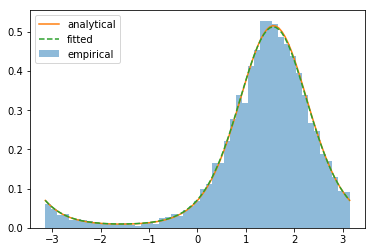

In [4]:
n_samples = 10_000
mu = 0.5* np.pi
kappa = 2

x = np.random.vonmises(mu, kappa, size=n_samples)
mu_est, kappa_est = vonmises_fit(x)

u = np.linspace(-np.pi, +np.pi, 100)
plt.hist(x, bins=51, normed=True, label='empirical', alpha=0.5)
plt.plot(u, vonmises_pdf(u, mu, kappa), label='analytical')
plt.plot(u, vonmises_pdf(u, mu_est, kappa_est), label='fitted', ls='--')
plt.legend(loc='best')
pass

## The exponential family

$$
\begin{eqnarray}
    p(x|\eta) &=& h(x) g(\eta) \exp \eta^T u(x) \\
    p(\eta|\nu, \chi) &=& f(\chi, \nu) g(\eta)^\nu \exp \nu \eta^T \chi
\end{eqnarray}
$$

Posterior:

$$
\begin{eqnarray}
    p(\eta|\{x\}) &=& \left( \prod_n p(x_n|\eta) \right) p(\eta|\nu, \chi) \\
        &\propto& 
            g(\eta)^N \exp \left( \eta^T \sum_n u(x_n) \right)
            g(\eta)^\nu \exp \nu \eta^T \chi \\
        &=& 
            g(\eta)^{\nu + N} \exp \left( (\nu + N) \frac{\nu \chi + \sum_n u(x_n)}{\nu + N} \right) \\
    p(\eta|\{x\}) &=& p(\eta|\nu^\prime, \chi^\prime) \\
    \nu^\prime &=& \nu + N \\
    \chi^\prime &=& \frac{\nu \chi + \sum_n u(x_n)}{\nu + N}
\end{eqnarray}
$$

### Maximum likelihood for exponential family

$$
\begin{eqnarray}
    \mathcal{L} &=& \sum_n \log p(x_n|\eta) 
\\
    &=& \sum_n \eta^T u(x_n) + N \log g(\eta) + \mathrm{const}
\\
    \frac{\partial}{\partial \eta} \mathcal{L} &=&
        \sum_n u(x_n) + N \frac{\partial}{\partial \eta} \log g(\eta) = 0
\\
    -\frac{\partial}{\partial \eta} \log g(\eta) &=& \frac{1}{N} \sum_n u(x_n)
\end{eqnarray}
$$


For the Gaussian:

$$
\begin{eqnarray}
    p(x|\eta) = g(\eta) \exp\left[ \eta_1 u_1(x) + \eta_2 u_2(x) \right]
\\
    \eta_1 = \frac{\mu}{\sigma^2},\; \eta_2 = \frac{-1}{2 \sigma^2}
\\
    u_1(x) = x,\; u_2(x) = x^2 
\\
    -\log g(\eta) = \frac{1}{2} \log \pi - \frac{1}{2} \log -\eta_2 - \frac{1}{4} \frac{\eta_1^2}{\eta_2}
\\
    -\log \frac{\partial}{\partial \eta_1} g(\eta) = \mu 
\\
    -\log \frac{\partial}{\partial \eta_2} g(\eta) = \mu^2 + \sigma^2
\end{eqnarray}
$$

For Bernoulli

$$
\begin{eqnarray}
    p(x|\mu) &=& \mu^x (1 - \mu)^{1 - x}  = \left( \frac{\mu}{1 - \mu} \right)^x \left( 1 - \mu \right)
\\
    &=& g(\eta) \exp \eta x
\\
    \eta &=& \log \frac{\mu}{1 - \mu} 
\\
    g(\eta) &=& \sigma(-\eta)
\\
    -\frac{\partial}{\partial \eta} \log g(\eta) 
        &=& \frac{1}{\sigma(-\eta)} \sigma(\eta) \sigma(-\eta) = \sigma(\eta) = \mu
\end{eqnarray}
$$